
# Proyecto
### Erick Fernando López Fimbres.  
#### erick.lopez.fimbres@gmail.com

## Limpieza

Para poder utilizar las tecnicas apropiadas de procesamiento del lenguaje natural, primero debemos de limpiar los datos que estan en el archivo bajado de wikipedia, en nuestro caso se llama **"todas_las_enfermedades.xml"**, el cual esta situado en la carpeta **datos** de este proyecto.

Está es una de las etapas más importantes, puesto que para poder obtener resultados debemos darle un tratamiento a los datos, al rededor del 80% del tiempo es invertido en esta etapa.

Nuestro primer paso será la elaboración de un **lexicón** el cual se define como **conjunto de lexemas en un contexto determinado** en nuestro caso será construir un lexicon específico para el contexto de enfermedades. 




## Lexicón

La idea básica en la construcción de un lexicón es optimizar la cantidad de términos en nuestro diccionario: muchas palabras permiten reconocer muchas características en un texto, pero representan un alto costo computacional; pocos términos en el lexicón es computacionalmente manejable, pero carece de capacidad para reconocer las características de un texto. Entonces el lexicón ideal es una combinación entre ambas el cual nos permite obtener características con un número de palabras no muy elevado pero tampoco demaciado reducido.

A continuación procederemos a crear nuestro lexicón con el archivo **"todas_las_enfermedades.xml"** bajado de wikipedia.

### Estructura de los datos

Primero procederemos a analizar la estructura de los datos del archivo que nos genera wikipedia, para así poder procesar los datos y limpiarlos.

In [9]:
import xml.etree.ElementTree as ET
#tree = ET.parse("datos/Enfermedades_geneticas.xml")
tree = ET.parse("datos/todas_las_enfermedades.xml")
root = tree.getroot()

print(root.tag, root.text)
for row, child in zip(range(3), root):
    print("1 ", child.tag, child.attrib)
    for grandchild in child:
        print("2   ", grandchild.tag, grandchild.attrib)
        for grand2child in grandchild:
            print("3     ", grand2child.tag, grand2child.attrib)
    print()

{http://www.mediawiki.org/xml/export-0.10/}mediawiki 
  
1  {http://www.mediawiki.org/xml/export-0.10/}siteinfo {}
2    {http://www.mediawiki.org/xml/export-0.10/}sitename {}
2    {http://www.mediawiki.org/xml/export-0.10/}dbname {}
2    {http://www.mediawiki.org/xml/export-0.10/}base {}
2    {http://www.mediawiki.org/xml/export-0.10/}generator {}
2    {http://www.mediawiki.org/xml/export-0.10/}case {}
2    {http://www.mediawiki.org/xml/export-0.10/}namespaces {}
3      {http://www.mediawiki.org/xml/export-0.10/}namespace {'key': '-2', 'case': 'first-letter'}
3      {http://www.mediawiki.org/xml/export-0.10/}namespace {'key': '-1', 'case': 'first-letter'}
3      {http://www.mediawiki.org/xml/export-0.10/}namespace {'key': '0', 'case': 'first-letter'}
3      {http://www.mediawiki.org/xml/export-0.10/}namespace {'key': '1', 'case': 'first-letter'}
3      {http://www.mediawiki.org/xml/export-0.10/}namespace {'key': '2', 'case': 'first-letter'}
3      {http://www.mediawiki.org/xml/export-0

Marcamos como 1, 2 y 3 los niveles descendientes del nodo raíz y posteriores. Una exploración detallada muestra que los nodos que nos interesan son los que marcamos a continuación:

![](imagenes/interes_export.png)



Analizando a detalle los elementos del nivel 1

In [10]:
for index, child in zip(range(len(root)), root):
    if(child.tag.find("page") < 0):
        print(index, child.tag)

0 {http://www.mediawiki.org/xml/export-0.10/}siteinfo


El unico nodo que no nos interesa a este nivel es root[0]

In [11]:
#Descartamos el primer hijo y analizamos el segundo
child = root[1]
for grandchild in child:
    if(grandchild.tag.find("title") >= 0):
        title = grandchild.text
        print(title)
    if(grandchild.tag.find("revision") >= 0): 
        for grand2child in grandchild:
            if(grand2child.tag.find("text") >= 0):
                text = grand2child.text
                print(text)

Infantilismo
[[Archivo:Windelfetischist.jpg|miniaturadeimagen|Un con infantilismo al tener el [[fetichismo del pañal]].]]
El '''infantilismo''' es una enfermedad en la que persisten en el [[adulto]] diversas características [[anatomía|anatómicas]], [[fisiología|fisiológicas]] y [[psicología|psicológicas]] de la [[infancia]]; se reconocen 4 tipos:

* Infantilismo psicosexual: El "infantilismo psíquico" consiste, según Hirschfeld, en la conservación del "modo de ser mental" de un niño. Se notaría "cierta parentela con grados ligeros de debilidad mental". [[Hirschfeld]] considera también como variante psíquica del infantilismo el "[[cisvestismo]]", a saber, el uso de vestidos de niño en edad adulta.

* Infantilismo de [[Brissaud]]: Un desorden congénito causado por una disminución de las [[hormona]]s [[glándulas tiroides|tiroideas]] durante el desarrollo [[feto|fetal]] o durante los primeros años de la vida. Se caracteriza por [[cretinismo]] y [[retraso mental]].

* Infantilismo de [[Lora

Ahora limpiaremos el texto:

In [27]:
from bs4 import BeautifulSoup
import re

child = root[1]
for grandchild in child:
    if(grandchild.tag.find("title") >= 0):
        title = grandchild.text
        print(title)
    if(grandchild.tag.find("revision") >= 0): 
        for grand2child in grandchild:
            if(grand2child.tag.find("text") >= 0):
                #Obtener el texto del nodo
                text = grand2child.text.lower()
                #Eliminar las cadenas que inician en {{ seguidas de 
                #cualquier cosa excepto }} y terminadas con }}
                
                #text = re.sub('{{[^}}]*}}', '', text)
                
                text = re.sub('{{[^}}{{]*}}', '', text)
                text = re.sub('{{[^}}{{]*}}', '', text)
                
                #text = re.sub('["jpg"]', '', text)
                
                #Misma idea, pero con el caracter especial \[ \] y Category:
                text = re.sub('\[\[Category:[^\]\]]*\]\]', '', text)
                #... y entre === ===
                text = re.sub('={3}[\w]+={3}', '', text)
                #... y entre == ==
                text = re.sub('={2}[\w]+={2}', '', text)
                #Extrae el texto de entre el código html... casi
                text = BeautifulSoup(text, "lxml").get_text()
                text = re.sub("<img([\w\W]+?)/?>", "", text)
                #Eliminar direcciones http
                text = re.sub('\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', ' ', text) 
                #... y direcciones de correo
                text = re.sub('[\w\.-]+@[\w\.-]+', " ", text)
                #... y direcciones wikt*
                text = re.sub('\[\[wikt[^|]*|', '', text)
                #Eliminar puntos decorativos como en S.H.I.E.L.D.
                text = text.replace(".","")
                #elimina las listas que aparecen así: 
                # * algo
                # * otra cosa
                text = text.replace("*","")             
                
                words = text.split()
                #Reenplazar el usos de apostrofos
                texto = [word for word in words]
                texto = " ".join(texto)
                #Eliminar otros caracteres no alfabéticos
                texto = re.sub("[^\w*]", " ", texto)
                texto = re.sub("[\d]", " ", texto)
                #Eliminar palabras repetidas consecutivas
                words = re.sub(r'\b(\w+)(\s+\1\b)+', r'\1', texto).split()
                texto = " ".join(words)
                
                print(texto)

Infantilismo
archivo windelfetischistjpg miniaturadeimagen un con infantilismo al tener el fetichismo del pañal el infantilismo es una enfermedad en la que persisten en el adulto diversas características anatomía anatómicas fisiología fisiológicas y psicología psicológicas de la infancia se reconocen tipos infantilismo psicosexual el infantilismo psíquico consiste según hirschfeld en la conservación del modo de ser mental de un niño se notaría cierta parentela con grados ligeros de debilidad mental hirschfeld considera también como variante psíquica del infantilismo el cisvestismo a saber el uso de vestidos de niño en edad adulta infantilismo de brissaud un desorden congénito causado por una disminución de las hormona s glándulas tiroides tiroideas durante el desarrollo feto fetal o durante los primeros años de la vida se caracteriza por cretinismo y retraso mental infantilismo de lorain un tipo de enanismo debida a una deficiencia de la secreción de la hormona del crecimiento y de la 

Una vez lo mas limpio el documento procederemos, con la limpieza, procesando todo el archivo xml y crearemos un objeto Dataframe

In [34]:
import os
from IPython.display import display
import pandas as pd
# Modificar la longitud de caracteres en una celda que se imprimirán 
pd.options.display.max_colwidth = 150 
import nltk
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords #palabras vacias 

#nltk.download() #descomenta esta linea si no tienes nltk
#tienes que descargar la libreria nltk para poder utilizarla

,nombre,descripcion,words_wsw
0,Infantilismo,archivo windelfetischistjpg miniaturadeimagen un con infantilismo al tener el fetichismo del pañal el infantilismo es una enfermedad en la que per...,"[archivo, windelfetischistjpg, miniaturadeimagen, infantilismo, tener, fetichismo, pañal, infantilismo, enfermedad, persisten, adulto, diversas, c..."
1,Pectus excavatum,el pectus excavatum es una deformidad congénita de la caja torácica caracterizada por pecho hundido en la región del esternón la probabilidad del ...,"[pectus, excavatum, deformidad, congénita, caja, torácica, caracterizada, pecho, hundido, región, esternón, probabilidad, pectus, excavatum, depen..."
2,Pectus carinatum,el pectus carinatum es una deformidad de la caja torácica en la que el pecho protruye en quilla ave quilla de barco es menos frecuente que el pect...,"[pectus, carinatum, deformidad, caja, torácica, pecho, protruye, quilla, ave, quilla, barco, menos, frecuente, pectus, excavatum, repercusiones, f..."
3,Onfalocele,la onfalocele u onfalocele infantil también llamado exonfalocele se da en el momento en el que el embrión presenta las vísceras de la región abdom...,"[onfalocele, u, onfalocele, infantil, llamado, exonfalocele, da, momento, embrión, presenta, vísceras, región, abdominal, cuerpo, aunque, casi, si..."
4,Período prepatogénico,el período prepatogénico precede a las manifestaciones clínica s y está conformado por las condiciones del huésped el agente y el medio ambiente e...,"[período, prepatogénico, precede, manifestaciones, clínica, s, conformado, condiciones, huésped, agente, medio, ambiente, período, aparición, mani..."


Cantidad de palabras en el corpus:  856867
Cantidad de palabras diferentes:  67504
Palabras utilizadas una vez:  32385

Palabras más populares:
 [('enfermedad', 6814), ('puede', 5291), ('síndrome', 5036), ('categoría', 4691), ('s', 4614), ('enfermedades', 4241), ('tratamiento', 3760), ('pueden', 3416), ('ser', 3412), ('síntomas', 3407), ('pacientes', 3090), ('casos', 2966), ('cáncer', 2891), ('diagnóstico', 2432), ('of', 2291), ('si', 2220), ('años', 1988), ('tipo', 1967), ('células', 1766), ('forma', 1713), ('and', 1612), ('personas', 1601), ('paciente', 1548), ('dos', 1469), ('aunque', 1455), ('niños', 1434), ('gen', 1430), ('riesgo', 1419), ('the', 1369), ('causa', 1341), ('dolor', 1301), ('mayor', 1291), ('desarrollo', 1268), ('referencias', 1262), ('caso', 1241), ('sistema', 1213), ('parte', 1212), ('debido', 1196), ('cada', 1177), ('virus', 1171), ('después', 1140), ('in', 1130), ('vida', 1126), ('infección', 1105), ('trastornos', 1105), ('edad', 1099), ('debe', 1099), ('general'

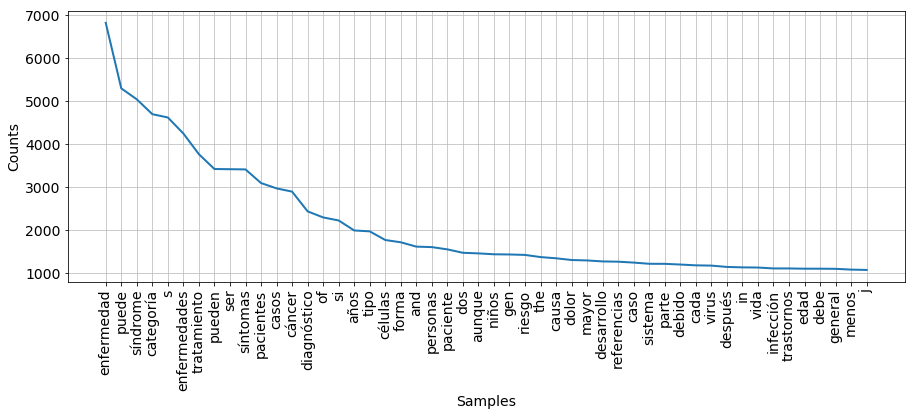

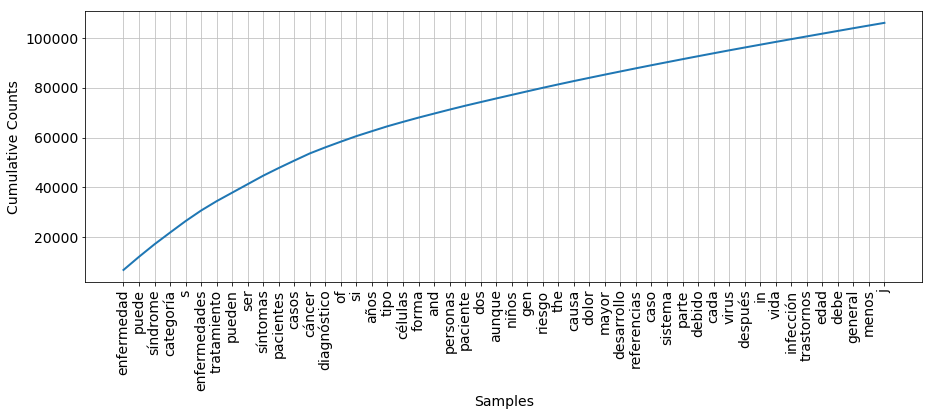

In [36]:
enfermedadesDf = pd.DataFrame(columns=["nombre", "descripcion"])

index = 0
for child in root:
    if(child.tag.find("page") >=0 ):
        for grandchild in child:
            if(grandchild.tag.find("title") >= 0):
                  title = grandchild.text
            if(grandchild.tag.find("revision") >= 0): 
                for grand2child in grandchild:
                    if(grand2child.tag.find("text") >= 0):
                        #Obtener el texto del nodo
                        text = grand2child.text.lower()
                        #Eliminar las cadenas que inician en {{ seguidas de 
                        #cualquier cosa excepto }} y terminadas con }}
                        
                        #llaves dentro de llaves
                        text = re.sub('{{[^}}{{]*}}', '', text)
                        text = re.sub('{{[^}}{{]*}}', '', text)
                
                        #Misma idea, pero con el caracter especial \[ \] y Category:
                        text = re.sub('\[\[Category:[^\]\]]*\]\]', '', text)
                        #... y entre === ===
                        text = re.sub('={3}[\w]+={3}', '', text)
                        #... y entre == ==
                        text = re.sub('={2}[\w]+={2}', '', text)
                        #Extrae el texto de entre el código html... casi
                        text = BeautifulSoup(text, "lxml").get_text() 
                        text = re.sub("<img([\w\W]+?)/?>", "", text)
                        #Eliminar direcciones http
                        text = re.sub('\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', ' ', text) 
                        #... y direcciones de correo
                        text = re.sub('[\w\.-]+@[\w\.-]+', " ", text)
                        #... y direcciones wikt*
                        text = re.sub('\[\[wikt[^|]*|', '', text)
                        #Eliminar puntos decorativos como en S.H.I.E.L.D.
                        text = text.replace(".","")
                        #elimina las listas que aparecen así: 
                        # * algo
                        # * otra cosa
                        text = text.replace("*","")             
                
                        words = text.split()
                        texto = [word for word in words]
                        texto = " ".join(texto)
                        #Eliminar otros caracteres no alfabéticos
                        texto = re.sub("[^\w*]", " ", texto)
                        texto = re.sub("[\d]", " ", texto)
                        #Eliminar palabras repetidas consecutivas
                        words = re.sub(r'\b(\w+)(\s+\1\b)+', r'\1', texto).split()
                        texto = " ".join(words)
        enfermedadesDf.loc[index] = [title, texto]
        index = index + 1
        
#Guardar La base de datos para posteriores usos
enfermedadesDf.to_json("datos/enfermedades.json", orient='records') 
stops = set(stopwords.words("spanish"))
enfermedadesDf["words_wsw"] = list(map(lambda row: [w for w in row.split() if not w in stops 
                                              and len(w)>0], enfermedadesDf.descripcion))

display(enfermedadesDf.head())

all_words = []
for row in enfermedadesDf.words_wsw:
    all_words.extend(row)
most_common_words = nltk.FreqDist(all_words)

print("Cantidad de palabras en el corpus: ", most_common_words.N())
numWords = len(most_common_words.most_common())
print("Cantidad de palabras diferentes: ", numWords)
uselessWords = most_common_words.hapaxes()
print("Palabras utilizadas una vez: ", most_common_words.Nr(1))
print("\nPalabras más populares:\n", most_common_words.most_common(50))

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(15, 5))
most_common_words.plot(50, cumulative=False)
plt.figure(figsize=(15, 5))
most_common_words.plot(50, cumulative=True)